In [17]:
%%html
<style>
table {align:left; display:block}
</style>

# Analysing and Predicting Heart Attacks using Clinical Parameters of Patients


## Data Dictionary

Several clinical parameters are listed below that will be required moving forward. This section will specifically address what the various variables represent and it explain where appropriate.

1. `age` - Age (in years)


2. `sex` - Gender
    * `0`: Female
    * `1`: Male


3. `cp` - Type of chest pain
    * `0`: `Typical Angina`: It's a substernal chest ache brought on by physical activity or emotional stress, and it's treated with nitroglycerine or rest (or both).
    * `1`: `Atypical Angina`: It is a condition in which a person has chest pain but does not fit the Angina requirements. Angina chest ache is a pressure or squeezing sensation that occurs when the coronary heart muscles do not receive enough oxygenated blood.
    * `2`: `Non-Anginal Pain`: It is a sort of chest ache that is similar to chest pain in persons who do not have a cardiac condition. "Non-cardiac chest pain" is another name for it.
    * `3`: `Asymptomatic`: It's a disorder with fleeting symptoms, little to no symptoms, or symptoms that aren't easily mistaken for a heart attack. It's sometimes referred to as a "silent heart attack."


4. `trestbps` - Resting / Normal blood pressure of a person (measured in mmHg)


| BLOOD PRESSURE CATEGORY | SYSTOLIC mm Hg | DIASTOLIC mm Hg |
| :- | :-: | :-: |
| NORMAL | LESS THAN 120 | LESS THAN 80 |
| ELEVATED | 120-129 | LESS THAN 80 |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1 | 130-139 | 80-89 |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2 | 140 OR HIGHER | 90 OR HIGHER |
| HYPERTENSIVE CRISIS | HIGHER THAN 180 | HIGHER THAN 120 |


5. `chol` - Cholesterol (measured in mg/dl)


6. `fbs` - Fasting blood sugar > 120 mg/dl
    * `0`: False
    * `1`: True
    
    
7. `restecg` - Resting electrocardiographic results
    * 0: Normal
    * 1: Has ST-T Wave abnormality
    * 2: Has or shows signs of left ventricular hypertrophy


8. `thalach` - The person's maximum heart rate achieved


9. `exang` - Exercise induced Angina
    * `0`: No
    * `1`: Yes


10. `oldpeak` - Exercise relative to rest


11. `slp` - Slope of the exercise induced ST segment
    * `0`: `Upsloping`: Heart rate becomes better with exercise
    * `1`: `Flatsloping`: Healthy heart with barely any change
    * `2`: `Downsloping`: Unhealthy heart


12. `caa` - Number of major vessels (0-4)


13. `thal` - Result of thallium stress test (0-3)


14. `output` - Has had a heart attack or not
    * `0`: No
    * `1`: Yes

# Import Libraries

In [18]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install hvplot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import hvplot.pandas
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
# The csv dataset file has been loaded and assigned to the variable 'patients.'
patients=pd.read_csv('patients.csv')

# Exploratory Data Analysis (EDA)

In [20]:
# examining the dataset
print("This dataset consists of " + str(patients.shape[0]) + " rows and " + str(patients.shape[1]) + " columns")

This dataset consists of 303 rows and 14 columns


In [21]:
# printing the dataset's first five records
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,caa,thal,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


When looking at the above table, it's clear that the columns contain both category and continuous variables. The variables are separated into categories to help to comprehend the column values when you move along.


1. The categorial columns
    * `sex`
    * `cp`
    * `fbs`
    * `restecg`
    * `exang`
    * `slp`
    * `caa`
    * `thal`
    * `output`
    
    
2. The continuous columns
    * `age`
    * `trestbps`
    * `chol`
    * `thalach`
    * `oldpeak`
    

Next, analyze the attribute's data types.

In [22]:
# displaying the data types
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thal      303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Next, search for any null values that may exist in the dataset.

In [23]:
# checking for null values
patients.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slp         0
caa         0
thal        0
output      0
dtype: int64

The output above shows that the dataset does not contain any null values.
Next, search for any duplicate records that could cause the model to overfit as a result of the bias.

In [24]:
# searching for duplicate records
patients[patients.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,caa,thal,output
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


The output shows that there is a record that has been duplicated. As a result, it must be eliminated before proceeding.

In [25]:
# duplicates are removed from the data frame
patients.drop_duplicates(keep='first',inplace=True)

Examine to see if the duplicated record was removed. If it's eliminated, there should be 302 records instead of the previous 303.

In [26]:
#re-analyzing the dataset
print("This dataset consists of " + str(patients.shape[0]) + " rows")

This dataset consists of 302 rows


The duplicated record has been eliminated, as evidenced by the above output.
Next, see the dataset's statistics summary next.

In [27]:
# setting the two decimal places for the floating value
pd.set_option("display.float", "{:.2f}".format)

# Because a statistical summary is required, label the columns for the continuous variables.
continuous_val = ["age","trestbps","chol","thalach","oldpeak"]
patients[continuous_val].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00,302.00,302.00,302.00,302.00
mean,54.42,131.60,246.50,149.57,1.04
std,9.05,17.56,51.75,22.90,1.16
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,133.25,0.00
50%,55.50,130.00,240.50,152.50,0.80
75%,61.00,140.00,274.75,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


Make a graph to show the number of patients who have had a heart attack versus those who haven't.

In [28]:
# Graph the number of patients who have had a heart attack versus those who have not.
patients.output.value_counts().hvplot.bar(
    title="Number of people who have suffered a heart attack (1) vs who have not (0)", 
    xlabel='People who have suffered from a Heart Attack', 
    ylabel='Count', 
    width=640
)

:Bars   [index]   (output)

In [29]:
md(f"#### The above graph depicts that {patients.output.value_counts()[1]} patients out of {patients.shape[0]} have suffered from a heart attack, while the remaining {patients.output.value_counts()[0]} have not.")

#### The above graph depicts that 164 patients out of 302 have suffered from a heart attack, while the remaining 138 have not.

### Plot the graphs depicting the number of people who have and have not had a heart attack versus the category variables.

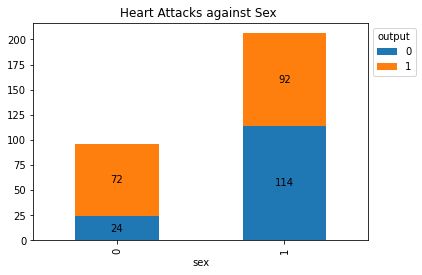

In [30]:
# graph of cardiac attacks versus sex graph
sex_output_ct=pd.crosstab(patients.sex,patients.output) 
sex_output_plot = sex_output_ct.plot(kind='bar', stacked=True)
sex_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in sex_output_plot.containers:
    sex_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Sex ') 
plt.show()

In [31]:
females_affected = 72
males_affected = 92
females_affected_percentage = round((females_affected/patients.sex.value_counts()[0])*100)
males_affected_percentage = round((males_affected/patients.sex.value_counts()[1])*100)
md(f"#### The above graph shows that : <br><br> Out of {patients.sex.value_counts()[0]} female patients, {females_affected} have had a heart attack which is around {females_affected_percentage}% of all females <br><br> Out of {patients.sex.value_counts()[1]} male patients, {males_affected} have had a heart attack which is around {males_affected_percentage}% of all males")

#### The above graph shows that : <br><br> Out of 96 female patients, 72 have had a heart attack which is around 75% of all females <br><br> Out of 206 male patients, 92 have had a heart attack which is around 45% of all males

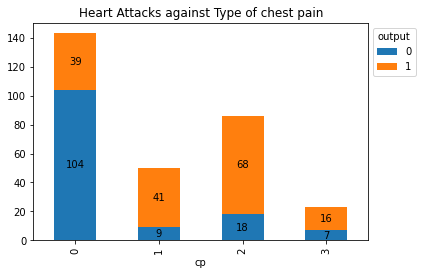

In [32]:
# graph of Heart attacks plotted against the sort of chest pain
cp_output_ct=pd.crosstab(patients.cp,patients.output) 
cp_output_plot = cp_output_ct.plot(kind='bar', stacked=True)
cp_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in cp_output_plot.containers:
    cp_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Type of chest pain') 
plt.show()

In [33]:
affected_0 = 39
affected_1 = 41
affected_2 = 68
affected_3 = 16
affected_0_percentage = round((affected_0/patients.cp.value_counts()[0])*100)
affected_1_percentage = round((affected_1/patients.cp.value_counts()[1])*100)
affected_2_percentage = round((affected_2/patients.cp.value_counts()[2])*100)
affected_3_percentage = round((affected_3/patients.cp.value_counts()[3])*100)
md(f"#### The above graph shows that : <br><br> Out of {patients.cp.value_counts()[0]} patients that suffered from a Typical Angina (0), {affected_0} have had a heart attack which is around {affected_0_percentage}% of all the patients that suffered a Typical Angina (0)  <br><br> Out of {patients.cp.value_counts()[1]} patients that suffered from a Atypical Angina (1), {affected_1} have had a heart attack which is around {affected_1_percentage}% of all the patients that suffered a Atypical Angina (1) <br><br> Out of {patients.cp.value_counts()[2]} patients that suffered from a Non-Anginal Pain (2), {affected_2} have had a heart attack which is around {affected_2_percentage}% of all the patients that suffered a Non-Anginal Pain (2) <br><br> Out of {patients.cp.value_counts()[3]} patients that suffered from a Asymptomatic (3), {affected_3} have had a heart attack which is around {affected_3_percentage}% of all the patients that suffered a Asymptomatic (3) <br><br>")

#### The above graph shows that : <br><br> Out of 143 patients that suffered from a Typical Angina (0), 39 have had a heart attack which is around 27% of all the patients that suffered a Typical Angina (0)  <br><br> Out of 50 patients that suffered from a Atypical Angina (1), 41 have had a heart attack which is around 82% of all the patients that suffered a Atypical Angina (1) <br><br> Out of 86 patients that suffered from a Non-Anginal Pain (2), 68 have had a heart attack which is around 79% of all the patients that suffered a Non-Anginal Pain (2) <br><br> Out of 23 patients that suffered from a Asymptomatic (3), 16 have had a heart attack which is around 70% of all the patients that suffered a Asymptomatic (3) <br><br>

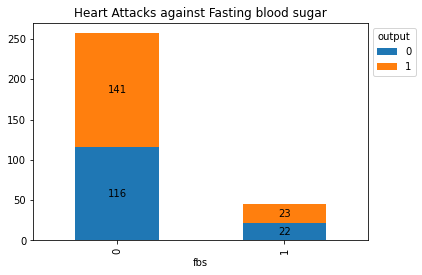

In [34]:
# graph of Heart attacks plotted against fasting blood sugar
fbs_output_ct=pd.crosstab(patients.fbs,patients.output) 
fbs_output_plot = fbs_output_ct.plot(kind='bar', stacked=True)
fbs_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in fbs_output_plot.containers:
    fbs_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Fasting blood sugar') 
plt.show()

In [35]:
affected_0_fbs = 141
affected_1_fbs = 23
affected_0_fbs_percentage = round((affected_0_fbs/patients.fbs.value_counts()[0])*100)
affected_1_fbs_percentage = round((affected_1_fbs/patients.fbs.value_counts()[1])*100)
md(f"#### The above graph shows that : <br><br>  Out of {patients.fbs.value_counts()[0]} patients that had fasting blood sugar levels <= 120 mg/dl, {affected_0_fbs} have had a heart attack which is around {affected_0_fbs_percentage}% of all the patients that has fasting blood sugar levels <= 120 mg/dl <br><br>  Out of {patients.fbs.value_counts()[1]} patients that had fasting blood sugar levels > 120 mg/dl, {affected_1_fbs} have had a heart attack which is around {affected_1_fbs_percentage}% of all the patients that has fasting blood sugar levels > 120 mg/dl <br><br>")

#### The above graph shows that : <br><br>  Out of 257 patients that had fasting blood sugar levels <= 120 mg/dl, 141 have had a heart attack which is around 55% of all the patients that has fasting blood sugar levels <= 120 mg/dl <br><br>  Out of 45 patients that had fasting blood sugar levels > 120 mg/dl, 23 have had a heart attack which is around 51% of all the patients that has fasting blood sugar levels > 120 mg/dl <br><br>

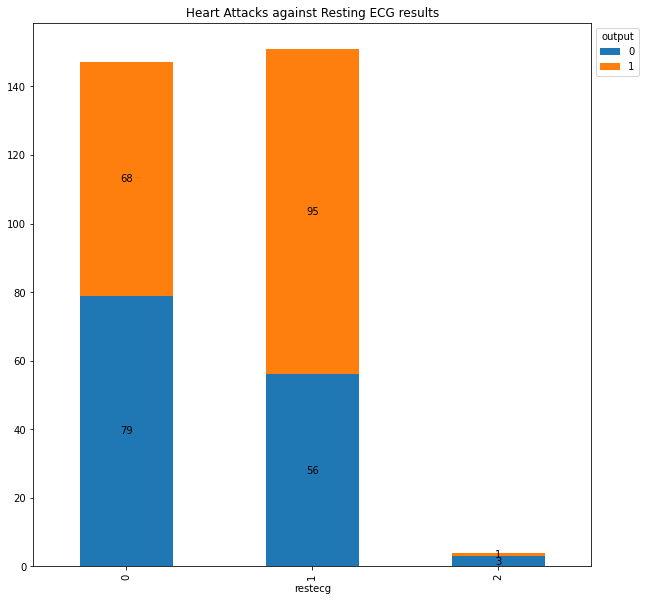

In [36]:
# graph of cardiac attacks plotted against resting ECG results
restecg_output_ct=pd.crosstab(patients.restecg,patients.output) 
restecg_output_plot = restecg_output_ct.plot(kind='bar', stacked=True, figsize=(10,10))
restecg_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in restecg_output_plot.containers:
    restecg_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Resting ECG results') 
plt.show()

In [37]:
affected_0_restecg = 68
affected_1_restecg = 95
affected_2_restecg = 1
affected_0_restecg_percentage = round((affected_0_restecg/patients.restecg.value_counts()[0])*100)
affected_1_restecg_percentage = round((affected_1_restecg/patients.restecg.value_counts()[1])*100)
affected_2_restecg_percentage = round((affected_2_restecg/patients.restecg.value_counts()[2])*100)
md(f"#### The above graph shows that : <br><br>  Out of {patients.restecg.value_counts()[0]} patients that showed Normal (0) results from the rested ECG, {affected_0_restecg} have had a heart attack which is around {affected_0_restecg_percentage}% of all the patients that showed Normal (0) results from the rested ECG <br><br> Out of {patients.restecg.value_counts()[1]} patients that showed ST-T Wave abnormality (1) from the rested ECG results, {affected_1_restecg} have had a heart attack which is around {affected_1_restecg_percentage}% of all the patients that showed ST-T Wave abnormality (1) from the rested ECG results <br><br> Out of {patients.restecg.value_counts()[2]} patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results, {affected_2_restecg} have had a heart attack which is around {affected_2_restecg_percentage}% of all the patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results <br><br>")

#### The above graph shows that : <br><br>  Out of 147 patients that showed Normal (0) results from the rested ECG, 68 have had a heart attack which is around 46% of all the patients that showed Normal (0) results from the rested ECG <br><br> Out of 151 patients that showed ST-T Wave abnormality (1) from the rested ECG results, 95 have had a heart attack which is around 63% of all the patients that showed ST-T Wave abnormality (1) from the rested ECG results <br><br> Out of 4 patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results, 1 have had a heart attack which is around 25% of all the patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results <br><br>

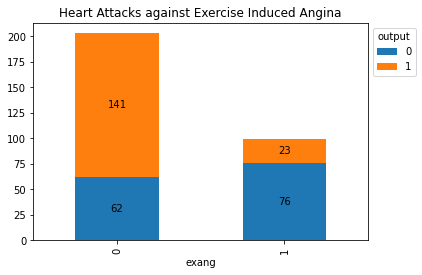

In [38]:
# graph of Heart attacks plotted against exercise-induced angina
exang_output_ct=pd.crosstab(patients.exang,patients.output) 
exang_output_plot = exang_output_ct.plot(kind='bar', stacked=True)
exang_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in exang_output_plot.containers:
    exang_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Exercise Induced Angina') 
plt.show()

In [39]:
affected_0_exang = 141
affected_1_exang = 23
affected_0_exang_percentage = round((affected_0_exang/patients.exang.value_counts()[0])*100)
affected_1_exang_percentage = round((affected_1_exang/patients.exang.value_counts()[1])*100)
md(f"#### The above graph shows that : <br><br>   Out of {patients.exang.value_counts()[0]} patients that did not show Angina induced through exercise, {affected_0_exang} have had a heart attack which is around {affected_0_exang_percentage}% of all the patients that did not show Angina induced through exercise <br><br>  Out of {patients.exang.value_counts()[1]} patients that showed Angina induced through exercise, {affected_1_exang} have had a heart attack which is around {affected_1_exang_percentage}% of all the patients that showed Angina induced through exercise <br><br>")

#### The above graph shows that : <br><br>   Out of 203 patients that did not show Angina induced through exercise, 141 have had a heart attack which is around 69% of all the patients that did not show Angina induced through exercise <br><br>  Out of 99 patients that showed Angina induced through exercise, 23 have had a heart attack which is around 23% of all the patients that showed Angina induced through exercise <br><br>

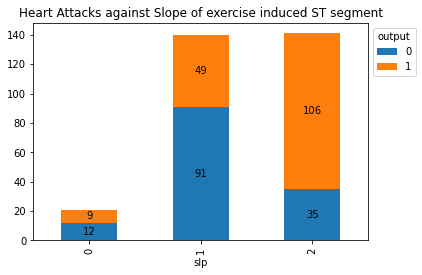

In [40]:
# graph of heart attacks versus exercise-induced ST segment slope
slp_output_ct=pd.crosstab(patients.slp,patients.output) 
slp_output_plot = slp_output_ct.plot(kind='bar', stacked=True)
slp_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in slp_output_plot.containers:
    slp_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Slope of exercise induced ST segment') 
plt.show()

In [41]:
affected_0_slp = 9
affected_1_slp = 49
affected_2_slp = 106
affected_0_slp_percentage = round((affected_0_slp/patients.slp.value_counts()[0])*100)
affected_1_slp_percentage = round((affected_1_slp/patients.slp.value_counts()[1])*100)
affected_2_slp_percentage = round((affected_2_slp/patients.slp.value_counts()[2])*100)
md(f"#### The above graph shows that : <br><br>  Out of {patients.slp.value_counts()[0]} patients with Upsloping exercise induced ST segment, {affected_0_slp} have had a heart attack which is around {affected_0_slp_percentage}% of all the patients with Upsloping exercise induced ST segment <br><br> Out of {patients.slp.value_counts()[1]} patients with Flatloping exercise induced ST segment, {affected_1_slp} have had a heart attack which is around {affected_1_slp_percentage}% of all the patients with Flatsloping exercise induced ST segment <br><br> Out of {patients.slp.value_counts()[2]} patients with Downsloping exercise induced ST segment, {affected_2_slp} have had a heart attack which is around {affected_2_slp_percentage}% of all the patients with Downsloping exercise induced ST segment <br><br>")

#### The above graph shows that : <br><br>  Out of 21 patients with Upsloping exercise induced ST segment, 9 have had a heart attack which is around 43% of all the patients with Upsloping exercise induced ST segment <br><br> Out of 140 patients with Flatloping exercise induced ST segment, 49 have had a heart attack which is around 35% of all the patients with Flatsloping exercise induced ST segment <br><br> Out of 141 patients with Downsloping exercise induced ST segment, 106 have had a heart attack which is around 75% of all the patients with Downsloping exercise induced ST segment <br><br>

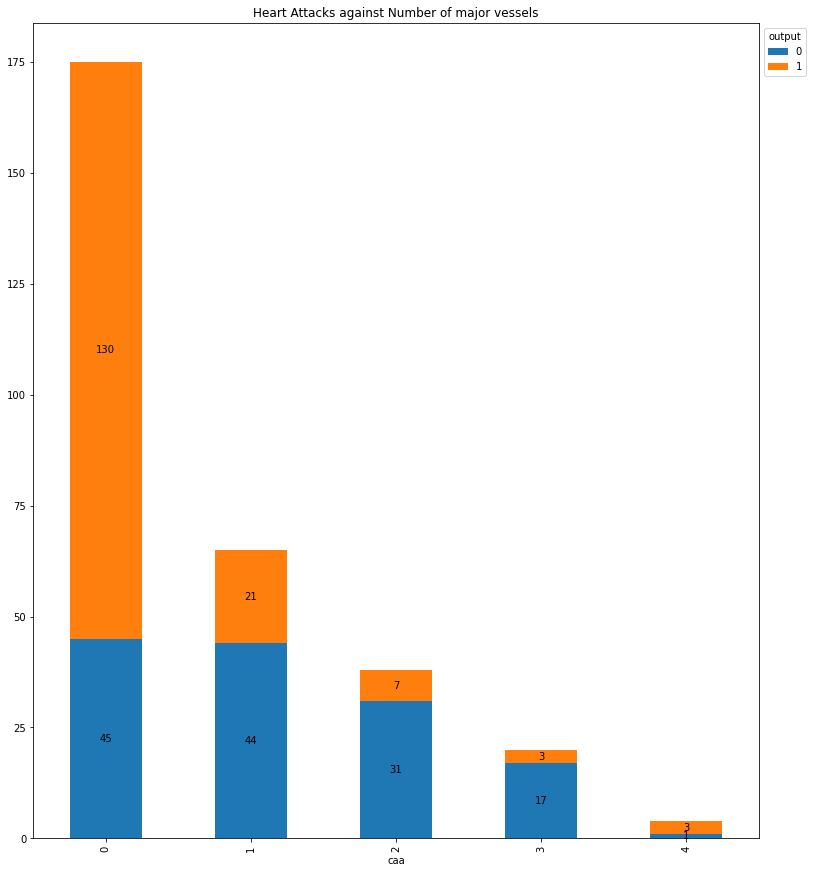

In [42]:
# graph of heart attacks as a function of the number of main vessels
caa_output_ct=pd.crosstab(patients.caa,patients.output) 
caa_output_plot = caa_output_ct.plot(kind='bar', stacked=True, figsize=(13,15))
caa_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in caa_output_plot.containers:
    caa_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Number of major vessels') 
plt.show()

In [43]:
affected_0_caa = 130
affected_1_caa = 21
affected_2_caa = 7
affected_3_caa = 3
affected_4_caa = 3
affected_0_caa_percentage = round((affected_0_caa/patients.caa.value_counts()[0])*100)
affected_1_caa_percentage = round((affected_1_caa/patients.caa.value_counts()[1])*100)
affected_2_caa_percentage = round((affected_2_caa/patients.caa.value_counts()[2])*100)
affected_3_caa_percentage = round((affected_3_caa/patients.caa.value_counts()[3])*100)
affected_4_caa_percentage = round((affected_4_caa/patients.caa.value_counts()[4])*100)
md(f"#### The above graph shows that : <br><br>  Out of {patients.caa.value_counts()[0]} patients with 0 Major Vessels, {affected_0_caa} have had a heart attack which is around {affected_0_caa_percentage}% of all the patients with 0 Major Vessels <br><br>  Out of {patients.caa.value_counts()[1]} patients with 1 Major Vessels, {affected_1_caa} have had a heart attack which is around {affected_1_caa_percentage}% of all the patients with 1 Major Vessels <br><br> Out of {patients.caa.value_counts()[2]} patients with 2 Major Vessels, {affected_2_caa} have had a heart attack which is around {affected_2_caa_percentage}% of all the patients with 2 Major Vessels <br><br>  Out of {patients.caa.value_counts()[3]} patients with 3 Major Vessels, {affected_3_caa} have had a heart attack which is around {affected_3_caa_percentage}% of all the patients with 3 Major Vessels <br><br> Out of {patients.caa.value_counts()[4]} patients with 4 Major Vessels, {affected_4_caa} have had a heart attack which is around {affected_4_caa_percentage}% of all the patients with 4 Major Vessels <br><br>")

#### The above graph shows that : <br><br>  Out of 175 patients with 0 Major Vessels, 130 have had a heart attack which is around 74% of all the patients with 0 Major Vessels <br><br>  Out of 65 patients with 1 Major Vessels, 21 have had a heart attack which is around 32% of all the patients with 1 Major Vessels <br><br> Out of 38 patients with 2 Major Vessels, 7 have had a heart attack which is around 18% of all the patients with 2 Major Vessels <br><br>  Out of 20 patients with 3 Major Vessels, 3 have had a heart attack which is around 15% of all the patients with 3 Major Vessels <br><br> Out of 4 patients with 4 Major Vessels, 3 have had a heart attack which is around 75% of all the patients with 4 Major Vessels <br><br>

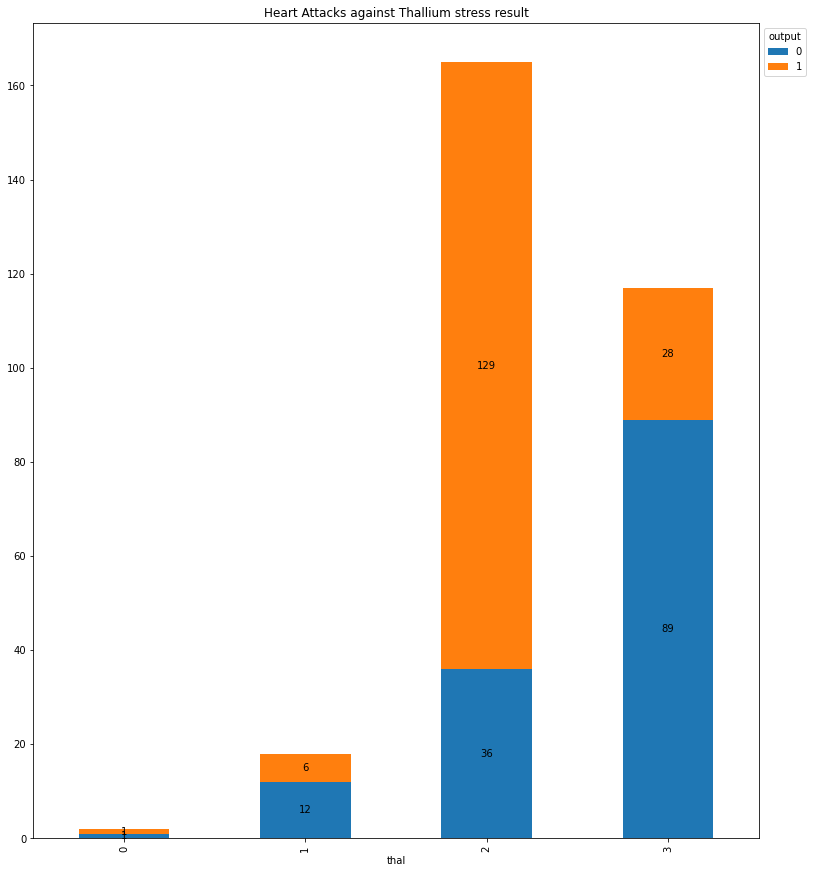

In [44]:
# graph of heart attacks versus thallium stress result graph
thal_output_ct=pd.crosstab(patients.thal,patients.output) 
thal_output_plot = thal_output_ct.plot(kind='bar', stacked=True, figsize=(13,15))
thal_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in thal_output_plot.containers:
    thal_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks against Thallium stress result') 
plt.show()

In [45]:
affected_0_thal = 1
affected_1_thal = 6
affected_2_thal = 129
affected_3_thal = 28
affected_0_thal_percentage = round((affected_0_thal/patients.thal.value_counts()[0])*100)
affected_1_thal_percentage = round((affected_1_thal/patients.thal.value_counts()[1])*100)
affected_2_thal_percentage = round((affected_2_thal/patients.thal.value_counts()[2])*100)
affected_3_thal_percentage = round((affected_3_thal/patients.thal.value_counts()[3])*100)
md(f"#### The above graph shows that : <br><br>  Out of {patients.thal.value_counts()[0]} patients with 0 as the result of the thallium stress test, {affected_0_thal} have had a heart attack which is around {affected_0_thal_percentage}% of all the patients with 0 as the result of the thallium stress test <br><br>  Out of {patients.thal.value_counts()[1]} patients with 1 as the result of the thallium stress test, {affected_1_thal} have had a heart attack which is around {affected_1_thal_percentage}% of all the patients with 1 as the result of the thallium stress test <br><br>  Out of {patients.thal.value_counts()[2]} patients with 2 as the result of the thallium stress test, {affected_2_thal} have had a heart attack which is around {affected_2_thal_percentage}% of all the patients with 2 as the result of the thallium stress test <br><br>  Out of {patients.thal.value_counts()[3]} patients with 3 as the result of the thallium stress test, {affected_3_thal} have had a heart attack which is around {affected_3_thal_percentage}% of all the patients with 3 as the result of the thallium stress test <br><br>")

#### The above graph shows that : <br><br>  Out of 2 patients with 0 as the result of the thallium stress test, 1 have had a heart attack which is around 50% of all the patients with 0 as the result of the thallium stress test <br><br>  Out of 18 patients with 1 as the result of the thallium stress test, 6 have had a heart attack which is around 33% of all the patients with 1 as the result of the thallium stress test <br><br>  Out of 165 patients with 2 as the result of the thallium stress test, 129 have had a heart attack which is around 78% of all the patients with 2 as the result of the thallium stress test <br><br>  Out of 117 patients with 3 as the result of the thallium stress test, 28 have had a heart attack which is around 24% of all the patients with 3 as the result of the thallium stress test <br><br>

### Correlation Matrix

#### Plot the Correlation matrix for the Continuous variables

(5.0, 0.0)

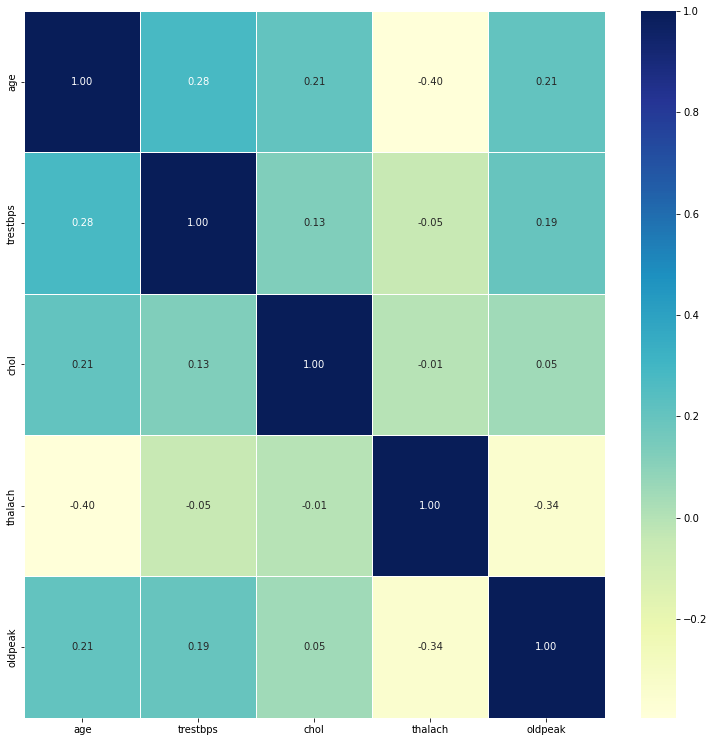

In [46]:
# plotting the correlation matrix considering the above-mentioned continuous variables
corr_matrix = patients[continuous_val].corr()
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)

In [47]:
# Relationship between heart attacks and continuous variables graph
patients[continuous_val].corrwith(patients.output).hvplot.barh(
    width=600,
    title="Correlation between Heart Attacks and Continuous Variables", 
    ylabel='Correlation', 
    xlabel='Continuous Variables',
)

:Bars   [index]   (0)

### From the above Correlation matrix we can depict that:



#### thalach (the maximal heart rate reached) has the largest positive link with the output, implying that the risk of a heart attack increases as the heart rate rises. 



#### oldpeak (exercise relative to rest) has the largest negative connection with output, implying that as oldpeak rises, the likelihood of a heart attack reduces. 



#### chol (cholesterol) has the lowest correlation value with the output, indicating that there is little link between cholesterol levels and the risk of heart attack.

# Data Processing

#### Convert the categorical variables using the `get_dummies` from `pandas` library into dummy values to create dummy columns because certain machine learning models are unable to handle categorical variables.

In [48]:
# conversion of categorical variables to dummy values
categorical_val = ["sex", "cp", "fbs", "restecg", "exang", "slp", "caa", "thal"]
updatedPatients = pd.get_dummies(patients, columns = categorical_val)
updatedPatients.head()

,age,trestbps,chol,thalach,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### Scale the continuous variables with `StandardScaler` from `sklearn.preprocessing` to make the models' learning and understanding of the problem more easier for the models.

In [49]:
# scaling the continous variables
standardScaler = StandardScaler()
updatedPatients[continuous_val] = standardScaler.fit_transform(updatedPatients[continuous_val])
updatedPatients.head()

,age,trestbps,chol,thalach,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.08,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.93,-0.09,0.07,1.64,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.49,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.17,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.59,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Model Building


#### Using the `train_test_split` method from `sklearn.model_selection`, split the dataset into training and validation sets.

In [50]:
# divide the data into two sets: training and validation
X = updatedPatients.drop('output', axis=1)
y = updatedPatients.output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model with Hyperparameter Tuning


#### To check the accuracy, a machine learning method is utilized here.

### Decision Tree Classifier with Hyperparameter Tuning

In [51]:
# defining parameter range
param_grid = {"criterion":("gini", "entropy"), 
              "splitter":("best", "random"),
              'max_depth': [2, 3, 5, 10, 20],
              "min_samples_split":[2, 3, 4],
              'min_samples_leaf': [5, 10, 20, 50, 100]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# printing best parameter after tuning
print(grid.best_params_)
 
# printing how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# printing the classification report
print(classification_report(y_test, grid_predictions))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42,
                       splitter='random')
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

